# Data Visualization

The purpose of data visualization is to communicate hidden information in the data. It can help us in understanding:

*   the distribution of features
*   relationships between two or more variables
*   comparisons between variables
*   the composition of data








Types of visualizations include:

*   Bar charts
*   Boxplots
*   Histograms
*   Scatter Plots
*   Stacked bar charts
*   Line charts

In addition to matplotlib, pandas and seaborn we will be using NumPy. NumPy can be used to perform a wide variety of mathematical operations on arrays. It adds powerful data structures to Python that guarantee efficient calculations with arrays and matrices and it supplies an enormous library of high-level mathematical functions that operate on these arrays and matrices.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Distribution

Distribution can mean a few things: frequency distribution, probability distribution or just the spread of the data with respect to central values (mean, median)

### Historgram

A histogram will tell us the frequency distribution. A frequency distribution gives the exact frequency of the number of times a data point occurs. For example, let's see the frequency of each age group on the Titanic.

In [2]:
df_titanic = pd.read_csv("https://raw.githubusercontent.com/raneemsultan/Data-Engineering-W21/main/Lab1/titanic.csv",index_col=0)

In [3]:
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(array([ 62., 102., 220., 167.,  89.,  48.,  19.,   6.,   1.,   0.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
 <a list of 10 Patch objects>)

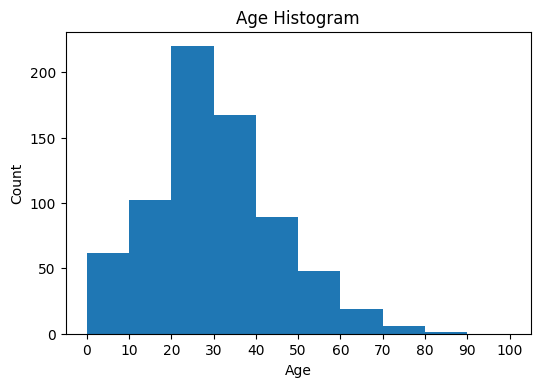

In [ ]:
#plot a histogram of age 
bins = [0,10,20,30,40,50,60,70,80,90,100]#the intervals (bins) of the histogram
fig, axs_1 = plt.subplots(1,1,dpi=100)
axs_1.set_title('Age Histogram')
axs_1.set_xlabel('Age')
axs_1.set_xticks(bins)
# axs_3.set_xlim([35,90]) #zoom in, or show me a certain area on the graph 
axs_1.set_ylabel('Count')
axs_1.hist(df_titanic['Age'],width=10,bins=bins)#a numpy array that has the ages of each passenger who survived (all ages not only unique values)

Another example is seeing how many people survived per each group.

In [4]:
df_survivedTitanic = (df_titanic[(df_titanic['Age'].notnull()) & (df_titanic['Survived']==1) ])
df_survivedTitanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


(array([38., 41., 77., 73., 34., 20.,  6.,  0.,  1.,  0.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
 <a list of 10 Patch objects>)

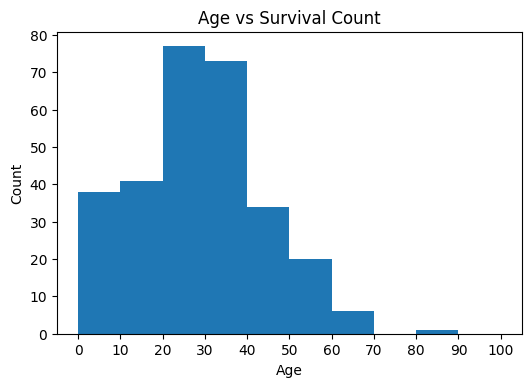

In [ ]:
#plot age vs survival count 
bins = [0,10,20,30,40,50,60,70,80,90,100]#the intervals (bins) of the histogram
fig, axs_2 = plt.subplots(1,1,dpi=100)
axs_2.set_title('Age vs Survival Count')
axs_2.set_xlabel('Age')
axs_2.set_xticks(bins)
# axs_3.set_xlim([35,90]) #zoom in, or show me a certain area on the graph 
axs_2.set_ylabel('Count')
axs_2.hist(df_survivedTitanic['Age'],width=10,bins=bins)#a numpy array that has the ages of each passenger who survived (all ages not only unique values)

### Kernel Density Plot

A kernel density plot tells us the probability distribution. The probability distribution gives the probability of occurrence of the given data point.

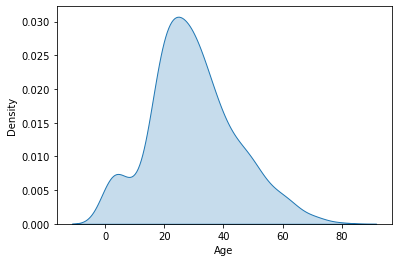

In [ ]:
sns.kdeplot(df_titanic["Age"], shade = True)

### Boxplot

A boxplot shows how a variable is spread with respect to its central tendancy. From the boxplot we can know:


1.   The median: the middle value
2.   Q1: the middle value between the smallest number and the median
3.   Q3: the middle value between the median and the largest number
4.   IQR: Q1-Q3
5.   The "minimum": Q1-1.5*IQR
6.   The "maximum": Q3+1.5*IQR
7.   The outliers



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


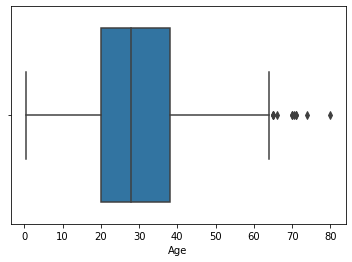

In [ ]:
sns.boxplot(df_titanic["Age"])

## Relationships

### Scatter Plot

Scatter plots show how much one variable is affected by another.

First, let's see if age affected the likelihood of surival. We can start by getting the rows where the age is not null and the passenger survived. We can do that by indexing the dataframe using a condition as you see below. This will return another dataframe with the rows that satisfy the condition only.

In [5]:
df_survivedTitanic = (df_titanic[(df_titanic['Age'].notnull()) & (df_titanic['Age']>=1) & (df_titanic['Survived']==1) ])
df_survivedTitanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Next, let's group by the age and sum up the survived column to see how many people survived for each age.

In [6]:
age_counts = df_survivedTitanic.groupby(['Age'])['Survived'].sum() #returns a series of each age and the corresponding number of individuals who survived
print(age_counts)

Age
1.0      5
2.0      3
3.0      5
4.0      7
5.0      4
6.0      2
7.0      1
8.0      2
9.0      2
11.0     1
12.0     1
13.0     2
14.0     3
15.0     4
16.0     6
17.0     6
18.0     9
19.0     9
20.0     3
21.0     5
22.0    11
23.0     5
24.0    15
25.0     6
26.0     6
27.0    11
28.0     7
29.0     8
30.0    10
31.0     8
32.0     9
32.5     1
33.0     6
34.0     6
35.0    11
36.0    11
37.0     1
38.0     5
39.0     5
40.0     6
41.0     2
42.0     6
43.0     1
44.0     3
45.0     5
47.0     1
48.0     6
49.0     4
50.0     5
51.0     2
52.0     3
53.0     1
54.0     3
55.0     1
56.0     2
58.0     3
60.0     2
62.0     2
63.0     2
80.0     1
Name: Survived, dtype: int64


Now we have everything we need to plot our graph.

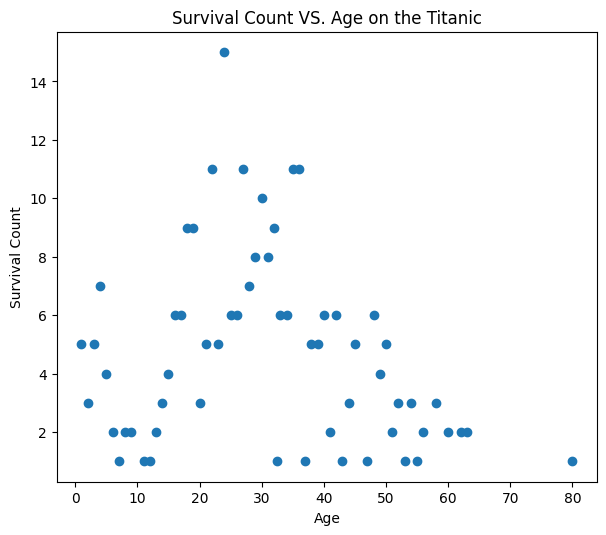

In [7]:
fig_1 = plt.figure(figsize=(6,5),dpi=100)
ax_3 = fig_1.add_axes([0.1,0.1,0.9,0.9]) #left, bottom, width, and height
ax_3.set_xlabel('Age')
ax_3.set_ylabel('Survival Count')
ax_3.set_title('Survival Count VS. Age on the Titanic')
ax_3.scatter(age_counts.index,age_counts)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


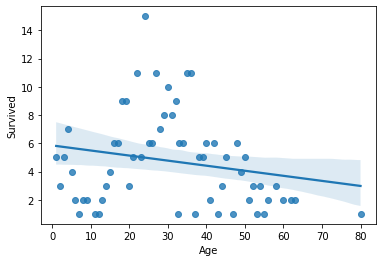

In [ ]:
sns.regplot(age_counts.index,age_counts)

### Joint Plot

A joint plot is a combination of scatter plot along with the density plots (histograms) for both features we're trying to plot. For example, in the car crashes dataset let's see if there is a relationship between the percentage of drivers that were speeding and percentage that were alcohol-impaired in each state.


In [8]:
df_car_crashes = sns.load_dataset("car_crashes")#seaborn has built in functions to retrieve datasets

In [9]:
df_car_crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


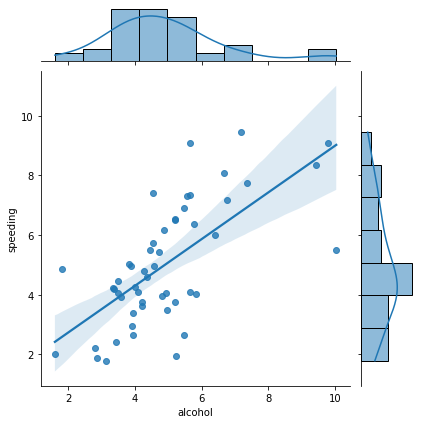

In [10]:
sns.jointplot(x='alcohol',y='speeding',data=df_car_crashes, kind='reg')#draws a regression line representing the 2 variables we are trying to identify

### Pair Plot

The pair plots show the relationship between every variable and every other variable.



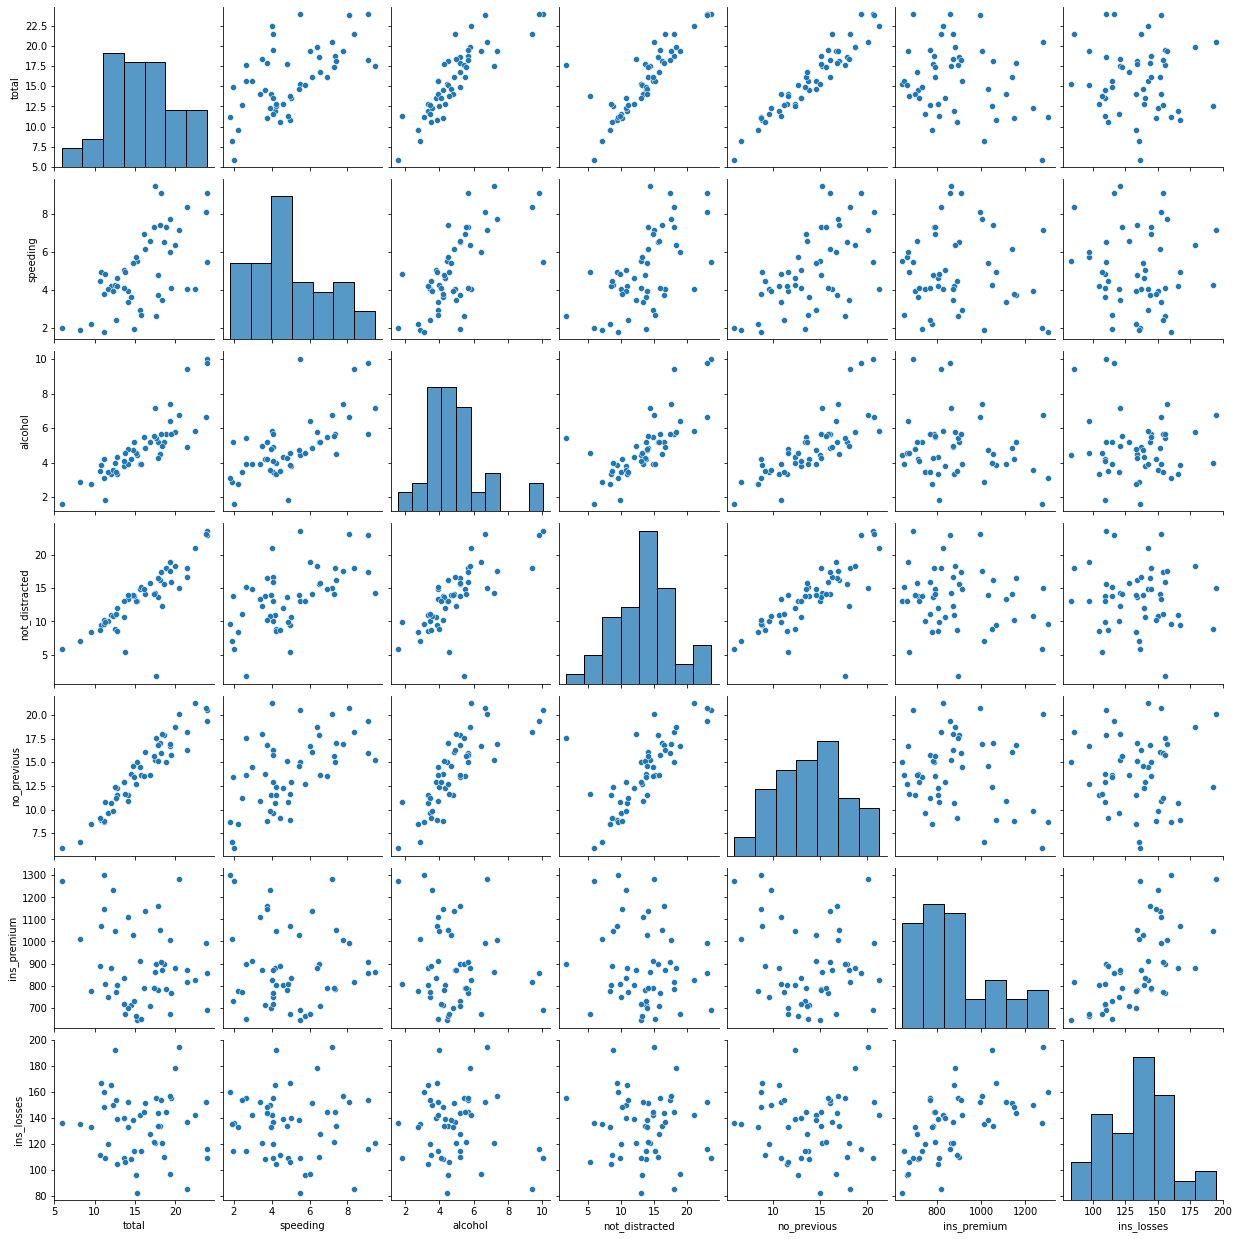

In [ ]:
sns.pairplot(df_car_crashes)

### Heatmap

Another way to see the correlations between variables is by using a heatmap.


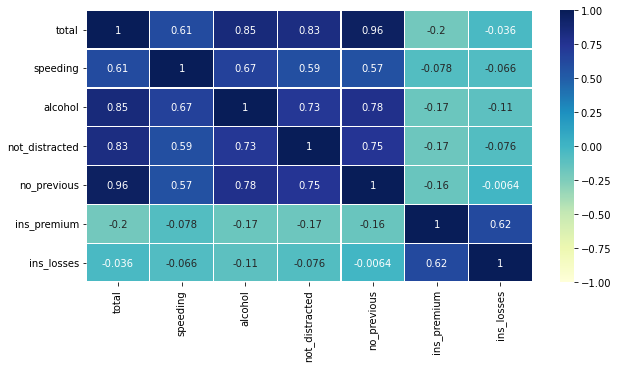

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df_car_crashes.corr(), annot=True, cmap="YlGnBu", vmin=-1, vmax=1, linewidths=.2)

## Comparison

### Line Chart


Line charts can be used to compare data. It’s commonly used in time series analysis where the temporal evolution of two sets of observations is compared.


In [13]:
df_gas = pd.read_csv("https://raw.githubusercontent.com/raneemsultan/Data-Engineering-W21/main/Lab2/gas_prices.csv",index_col=0) #index_col=0 means take first column as index

In [14]:
df_gas.head()

,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
Year,,,,,,,,,,
1990,NaN,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16
1991,1.96,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14
1992,1.89,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
1993,1.73,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11
1994,1.84,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11


Since we gave gas prices for the same countries over different years, we can use a line graph to compare between the trends of gas prices over time in different countries. In the cell below, we chose Japan and Italy as an example.

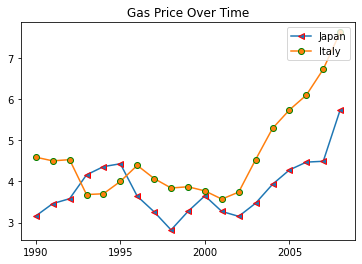

In [ ]:
plt.plot(df_gas.index, df_gas['Japan'], label="Japan", marker='<', markeredgecolor='red')
plt.plot(df_gas.index, df_gas['Italy'], label="Italy", marker='o', markeredgecolor='green')
plt.title('Gas Price Over Time') #note here plt.title is used right away. However, when using the axes, we use plt.set_title()
plt.locator_params(integer=True) #to make ticks on axes integers
plt.legend(loc=1)

In [15]:
spotify_data =pd.read_csv('https://raw.githubusercontent.com/raneemsultan/Data-Engineering-W21/main/Lab2/spotify.csv',parse_dates=True,index_col=0) #If parse_dates is enabled, pandas will attempt to infer the format of the datetime strings in the columns
spotify_data.tail()

,Shape of You,Despacito,Something Just Like This,HUMBLE.,Unforgettable
Date,,,,,
2018-01-05,4492978,3450315.0,2408365.0,2685857.0,2869783.0
2018-01-06,4416476,3394284.0,2188035.0,2559044.0,2743748.0
2018-01-07,4009104,3020789.0,1908129.0,2350985.0,2441045.0
2018-01-08,4135505,2755266.0,2023251.0,2523265.0,2622693.0
2018-01-09,4168506,2791601.0,2058016.0,2727678.0,2627334.0


Since we have the number of plays throughout the ones, then we can also use a line plot to see the trend of playing each of the songs.

Text(0, 0.5, 'Number of times played')

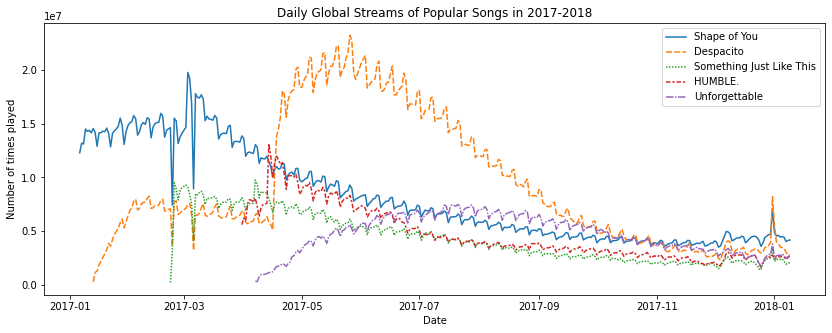

In [ ]:
# Set the width and the height of the figure
plt.figure(figsize=(14,5))
plt.title("Daily Global Streams of Popular Songs in 2017-2018")
# Line chart showing daily golabal streams of each song
sns.lineplot(data=spotify_data)
plt.ylabel('Number of times played')

### Bar Chart

Bar charts are some of the simplest and old school yet effective visualization techniques to communicate comparative analysis. Let's see if the Pclass affects the survival rates.

For example, let's compare between the total restaurant bills paid by customers on different days of the week. So this visual compares total bills between weekdays.

In [11]:
tips = sns.load_dataset("tips")

In [12]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


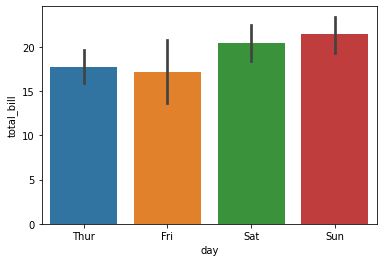

In [ ]:
sns.barplot(x = "day", y = "total_bill", data = tips)

## Composition

### Stacked Bar Chart

The purpose of composition charts is to show the composition of one or more variables in absolute and relative terms (e.g. percentage).


As an example, we will use the Titanic dataset again. This time let's show the composition of people who survived from each class according to their gender.

In [ ]:
male_class_Series = df_survivedTitanic[df_survivedTitanic['Sex']=='male'].groupby(['Pclass'])['Survived'].sum() #returns a series of males who survived grouped by class

In [ ]:
print(male_class_Series)

Pclass
1    39
2    12
3    37
Name: Survived, dtype: int64


In [ ]:
female_class_Series = df_survivedTitanic[df_survivedTitanic['Sex']=='female'].groupby(['Pclass'])['Survived'].sum() #returns a series of females who survived grouped by class

In [ ]:
print(female_class_Series)

Pclass
1    82
2    68
3    45
Name: Survived, dtype: int64


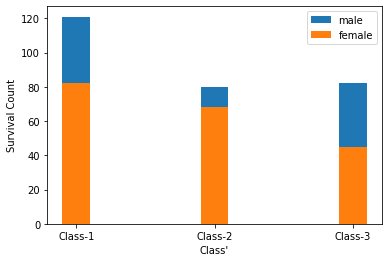

In [ ]:
fig_4, axs_5 = plt.subplots(1,1)
axs_5.set_xlabel("Class'")
axs_5.set_ylabel('Survival Count')
axs_5.bar(np.arange(len(male_class_Series.index)),male_class_Series,width=0.2,label="male",bottom=female_class_Series) # bottom: The y coordinate(s) of the bars bases (default: 0)
axs_5.bar(np.arange(len(female_class_Series.index)),female_class_Series,width=0.2,label="female")
plt.xticks(np.arange(len(male_class_Series.index)), [f"Class-{i}" for i in male_class_Series.index])# to create the labels of the x axis (Class-1, Class-2, Class-3)
axs_5.legend(loc=1)

# Task

For this task, you'll also be working with the happiness dataset.

In [16]:
happiness_2016 = pd.read_csv('https://raw.githubusercontent.com/raneemsultan/Data-Engineering-W21/main/Lab2/happiness_2016.csv')

In [ ]:
happiness_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


Plot the appropriate graphs that will answer the following questions:

1. How many countries are there per region?
2. Does money buy happiness?
3. Compare between the effect of life expectancy on happiness in top 50 countries vs bottom 50 countries
4. Compare between the distribution of GDP across regions
5. Compare between top 10 and bottom 10 countries in terms of the composition of the overall happiness score. More specifically, plot two graphs where the overall happiness score is divided into the seven parts corresponding to the columns: Economy, Family, Health, Freedom, Trust, Generosity, Dystopia.
